In [1]:
import numpy as np
import scipy.io
import scipy.signal
from matplotlib import pyplot as plt
import cmath

In [2]:
x = scipy.io.loadmat(r"C:\Users\Venkatesh Yeturi\OneDrive\Desktop\Class pdfs\Biomedical Signal Processing\Assignments\Assignment 2\original_ECG.mat")
x = x['original']
x

array([[39.60475775, 40.07076881, 40.5922544 , ..., 54.22427311,
        58.8477386 , 62.91896577]])

In [3]:
x.shape
x = x[0]

Text(0, 0.5, 'ECG signal')

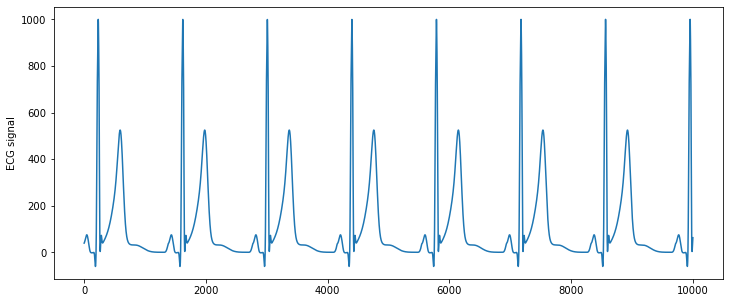

In [4]:
plt.figure(figsize=(12,5))
plt.plot(x)
# plt.xlabel('time (sec)')
plt.ylabel('ECG signal')

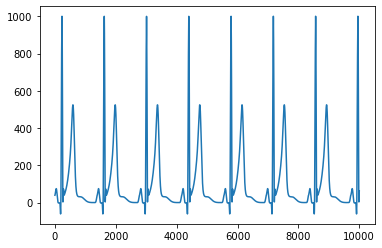

In [5]:
fs = 1000
N = len(x)
time = np.arange(len(x))
frequencies  = time*(1/fs)
plt.plot(time, x)

In [6]:
dft = np.fft.fft(x)

In [7]:
dft

array([1051051.42082599    +0.j        ,   12232.69647406 -4801.70190819j,
         12362.15439958-10218.08945944j, ...,
         12620.69947601+17149.44369972j,   12362.15439958+10218.08945944j,
         12232.69647406 +4801.70190819j])

In [8]:
freq = np.arange(len(dft))*(fs/len(dft))

(0.0, 500.0)

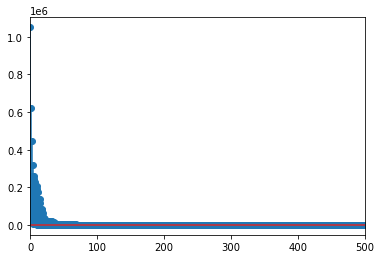

In [30]:
plt.stem(freq,np.abs(dft))
plt.xlim(0,500)

In [10]:
phase=np.zeros(len(x))
for i in range(len(x)):
    phase[i]=cmath.phase(dft[i])
phase

array([ 0.        , -0.37405029, -0.69072886, ...,  0.93636443,
        0.69072886,  0.37405029])

(0.0, 2000.0)

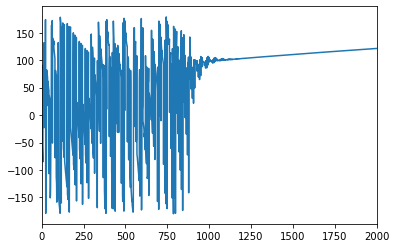

In [11]:
plt.plot(phase*180/np.pi)
plt.xlim(0,2000)

In [12]:
# magnitude and frequency at 30Hz
for i in range(N):
    if freq[i]==30:
        magnitude = abs(dft[i])
        angle = cmath.phase(dft[i])
        break
print(20*np.log10(magnitude))
print(angle*180/np.pi)

68.03065143452046
-41.82373688297548


2nd question

In [13]:
import librosa
import wave
import IPython.display as ipd
from scipy.io import wavfile, loadmat

In [14]:
sampling_rate,signal = wavfile.read(r"C:\Users\Venkatesh Yeturi\OneDrive\Desktop\Class pdfs\Biomedical Signal Processing\Assignments\Assignment 2\science.wav")
signal,sampling_rate

(array([   -1,     1,     2, ..., -1396, -1484, -1536], dtype=int16), 32000)

In [15]:
display(ipd.Audio(signal,rate=sampling_rate))

In [16]:
time = np.arange(len(signal))/sampling_rate

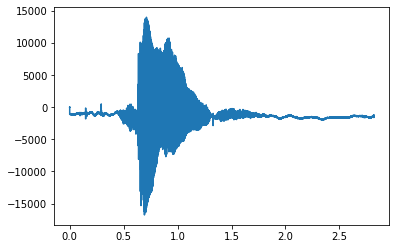

In [17]:
plt.plot(time,signal)

In [18]:
sig_std = np.std(signal)
sig_std

1733.7670245404108

In [19]:
noise_minus10dB= np.random.randn(len(signal))*(sig_std/np.sqrt(10))
noise_0dB = np.random.randn(len(signal))*(sig_std/1)
noise_10dB = np.random.rand(len(signal))*(sig_std*np.sqrt(10))                 # sqrt and square is from conversion of watt to db i.e -10db = 20log(base 10)(sig_std/noise_std)

In [20]:
signal_minus10dB = signal+noise_minus10dB
signal_0dB = signal + noise_0dB
signal_10dB = signal + noise_10dB

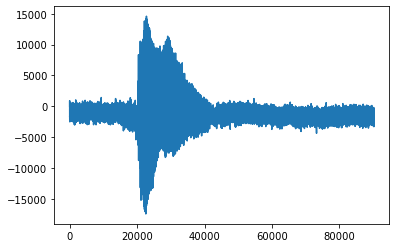

In [21]:
plt.plot(signal_minus10dB)

In [22]:
display(ipd.Audio(signal_10dB,rate=sampling_rate))

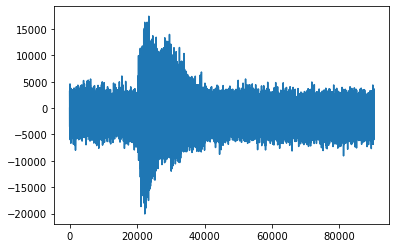

In [23]:
plt.plot(signal_0dB)

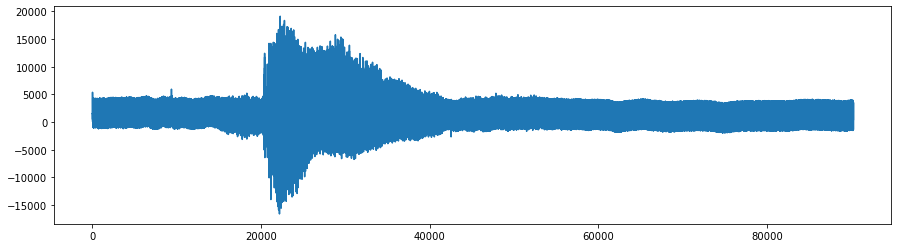

In [24]:
plt.subplots(1,1, figsize = (15, 4))
plt.plot(signal_10dB)

In [25]:
filtered_signal = scipy.signal.wiener(signal_10dB,50)

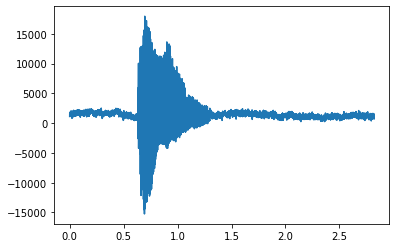

In [26]:
plt.plot(time,scipy.signal.wiener(signal_10dB,50))

In [27]:
def wiener(im,mysize=None,noise=None):
    im = np.asarray(im)
    if mysize is None:
        mysize = [3] * im.ndim
    mysize = np.asarray(mysize)
    if mysize.shape == ():
        mysize = np.repeat(mysize.item(), im.ndim)

    lMean = np.correlate(im, np.ones(mysize), 'same') / np.prod(mysize, axis=0)

    lVar = (np.correlate(im ** 2, np.ones(mysize), 'same') /
            np.prod(mysize, axis=0) - lMean ** 2)

    if noise is None:
        noise = np.mean(np.ravel(lVar), axis=0)

    res = (im - lMean)
    res *= (1 - noise / lVar)
    res += lMean
    out = np.where(lVar < noise, lMean, res)

    return out

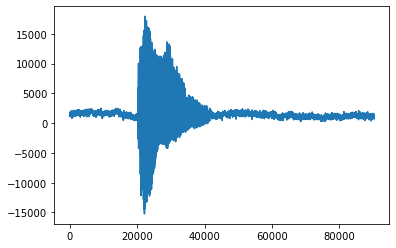

In [28]:
plt.plot(wiener(signal_10dB,50))